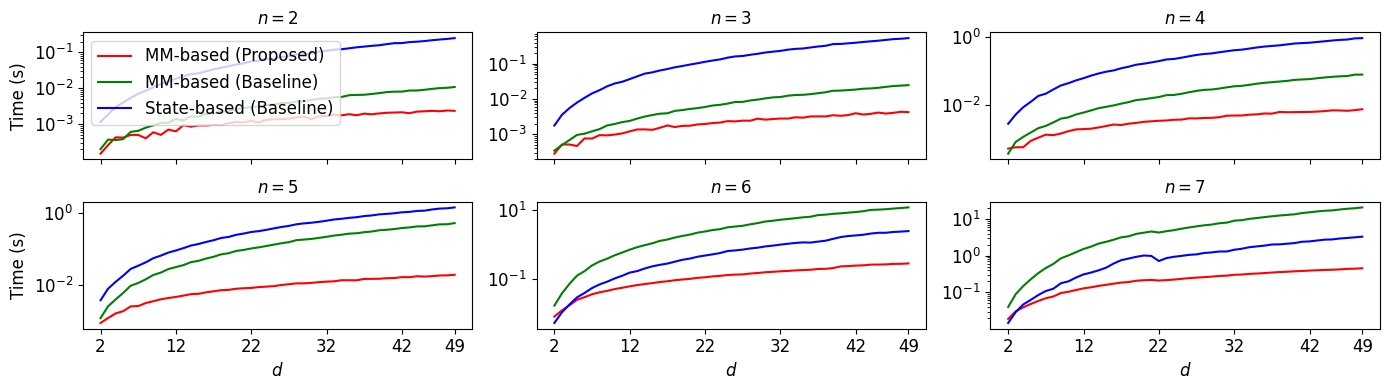

In [87]:
import matplotlib.pyplot as plt
import numpy as np
time_psr = np.genfromtxt('./result/time_psr.csv', delimiter=',')
time_proposed_psr = np.genfromtxt('./result/time_proposed_psr.csv', delimiter=',')
time_qiskit = np.genfromtxt('./result/time_qiskit.csv', delimiter=',')
depth = 5
num_qubit = 6
fig, axs = plt.subplots(2, 3, figsize = (14, 4))
j = 0
for i in range(2,8):
    x = j // 3
    y = j % 3
    
    axs[x,y].plot(range(2, 50),time_proposed_psr[i - 2][:], 'r', label = 'MM-based (Proposed)')
    axs[x,y].plot(range(2, 50), time_psr[i - 2][:], 'g', label = 'MM-based (Baseline)')
    axs[x,y].plot(range(2, 50), time_qiskit[i - 2][:], 'b', label = 'State-based (Baseline)')
    # Draw the line which = time_psr divide time_proposed_psr
    # ax2 = axs[x,y].twinx()
    # ax2.plot(range(2, 50), time_psr[i - 2][:] / time_proposed_psr[i - 2][:], 'g--', label = 'MM-based (Baseline) / MM-based (Proposed)')
    # ax2.plot(range(2, 50), time_qiskit[i - 2][:] / time_proposed_psr[i - 2][:], 'b--', label = 'MM-based (Baseline) / State-based (Proposed)')
    if y == 0:
        axs[x,y].set_ylabel('Time (s)', fontsize = 12)
    else:
        axs[x,y].set_yticklabels([])
    axs[x,y].set_xticks(list(range(2, 51, 10)) + [49])
    # ax2.set_yticks(list(range(0, 151, 50)))
    # ax2.tick_params(axis='y', labelsize=12)
    axs[x,y].tick_params(axis='y', labelsize=12)
    axs[x,y].tick_params(axis='x', labelsize=12)
    if x == 1:
        axs[x,y].set_xlabel(r'$d$', fontsize = 12)
    else:
        axs[x,y].set_xticklabels([])
    axs[x,y].set_yscale('log')
    
    axs[x,y].set_title(rf'$n = {i}$')
    j += 1
# set position of legend
axs[0,0].legend(loc='upper left', fontsize = 12)

plt.tight_layout()
plt.savefig('time_psr.svg')

C:\Users\haime\AppData\Local\Temp\ipykernel_26716\3745085699.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


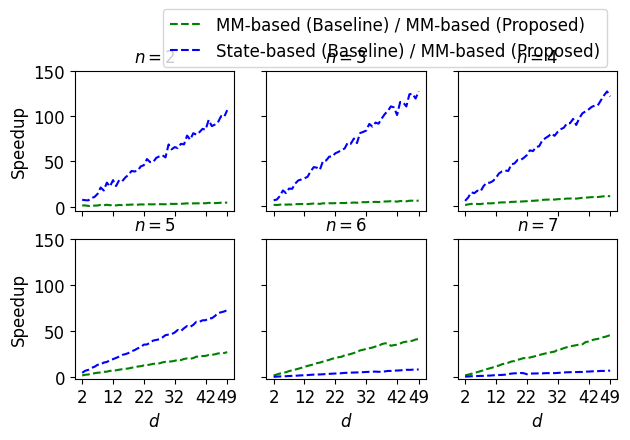

In [99]:
import matplotlib.pyplot as plt
import numpy as np
time_psr = np.genfromtxt('./result/time_psr.csv', delimiter=',')
time_proposed_psr = np.genfromtxt('./result/time_proposed_psr.csv', delimiter=',')
time_qiskit = np.genfromtxt('./result/time_qiskit.csv', delimiter=',')
depth = 5
num_qubit = 6
fig, axs = plt.subplots(2, 3, figsize = (7,4))
j = 0
for i in range(2,8):
    x = j // 3
    y = j % 3
    axs[x,y].plot(range(2, 50), time_psr[i - 2][:] / time_proposed_psr[i - 2][:], 'g--', label = 'MM-based (Baseline) / MM-based (Proposed)')
    axs[x,y].plot(range(2, 50), time_qiskit[i - 2][:] / time_proposed_psr[i - 2][:], 'b--', label = 'State-based (Baseline) / MM-based (Proposed)')
    #a
    axs[x,y].set_yticks(list(range(0, 151, 50)))
    # axs[x,y].set_yscale('log')
    if y == 0:
        
        axs[x,y].set_ylabel('Speedup', fontsize = 12)
    else:
        axs[x,y].set_yticklabels([])
    axs[x,y].set_xticks(list(range(2, 51, 10)) + [49])
    axs[x,y].tick_params(axis='y', labelsize=12)
    axs[x,y].tick_params(axis='x', labelsize=12)
    if x == 1:
        axs[x,y].set_xlabel(r'$d$', fontsize = 12)
    else:
        axs[x,y].set_xticklabels([])
    axs[x,y].set_title(rf'$n = {i}$')
    j += 1
# set position of legend
axs[0,0].legend(loc='upper left', fontsize = 12, ncol = 1, bbox_to_anchor=(0.5, 1.5))
#ax2.legend(loc='upper left')
plt.tight_layout()
plt.savefig('time.svg')

In [96]:
qiskit_times = []
mm_times = []
for i in range(0,6):
    qiskit_times.append(time_qiskit[i][:]/time_proposed_psr[i][:])
    mm_times.append(time_psr[i][:]/time_proposed_psr[i][:])
qiskit_times = np.array(qiskit_times).flatten()
mm_times = np.array(mm_times).flatten()
print(np.mean(qiskit_times))
print(np.mean(mm_times))

38.867878382023406
12.21243179240584


In [97]:
qiskit_times

array([  7.65631549,   7.15988489,   6.97076251,   9.56684067,
        10.72466397,  14.12669748,  21.17059326,  17.8727078 ,
        26.58391122,  22.23722766,  29.29113751,  22.81669552,
        29.33145029,  28.17950762,  32.28466212,  35.15795194,
        39.42831219,  38.83232517,  39.85479428,  44.48273777,
        45.78426832,  52.57971844,  49.21141586,  49.13925114,
        53.84048344,  55.47023538,  56.80423975,  54.33153428,
        68.67144187,  63.28028128,  65.73888121,  64.64789861,
        69.3185086 ,  68.75527193,  78.43392236,  73.95075946,
        81.07673664,  79.41862608,  82.19148789,  85.86343286,
        84.98457488,  95.75779744,  88.87510391,  90.58100629,
        93.06207539,  99.83505842,  98.88729194, 106.5103307 ,
         6.30546947,   6.94909969,  10.80704017,  17.17601819,
        14.20878196,  19.21056409,  18.94805228,  24.76117553,
        28.28515564,  29.30685849,  30.58904961,  32.3204969 ,
        38.40026852,  43.04232652,  42.41177852,  40.15

In [21]:
import qimax.splitter
from qoop.core.random_circuit import generate_with_pool
import qimax.utilities
import qimax.tensor
import qimax.gate
import qimax.converter
import numpy as np, qiskit, re

num_qubits = list(range(2, 8))

depths = list(range(2, 50))

mem_mms = np.zeros((len(num_qubits), len(depths)))
mem_pmms = np.zeros((len(num_qubits), len(depths)))
mem_states = np.zeros((len(num_qubits), len(depths)))

for i, num_qubit in enumerate(num_qubits):
    for j, depth in enumerate(depths):
        mem_mm = []
        mem_pmm = []
        mem_state = []
        for k in range(50):
            qc = generate_with_pool(num_qubit, depth)
            qc = qc.assign_parameters(np.ones(qc.num_parameters))
            qasm_gates = qimax.converter.qasm_to_qasmgates(qimax.converter.qc_to_qasm(qc))
            qcs = qimax.splitter.qasmgates_to_qcs2(qasm_gates)
            #qcs.reverse() 
            m = (len(qcs))
            nhats = []
            for qasmgates in qcs:
                nhats.append(len(qasmgates))
                
            mem_mm.append(2**num_qubit * 2**num_qubit + 2**num_qubit) # For U, |psi>
            mem_pmm.append((2**num_qubit * 2**num_qubit) * (1 + m + m) + 2**num_qubit * 2**num_qubit) # For U # For LUT, 1 Uhead, m U_{j:m-1}, m U_j
            mem_state.append(2**num_qubit) # For |psi>
        mem_mms[i, j] = np.mean(mem_mm)
        mem_pmms[i, j] = np.mean(mem_pmm)
        mem_states[i, j] = np.mean(mem_state)
np.savetxt(f"result/mem_psr.csv", mem_mms, delimiter=",")
np.savetxt(f"result/mem_proposed_psr.csv", mem_pmms, delimiter=",")
np.savetxt(f"result/mem_qiskit.csv", mem_states, delimiter=",")

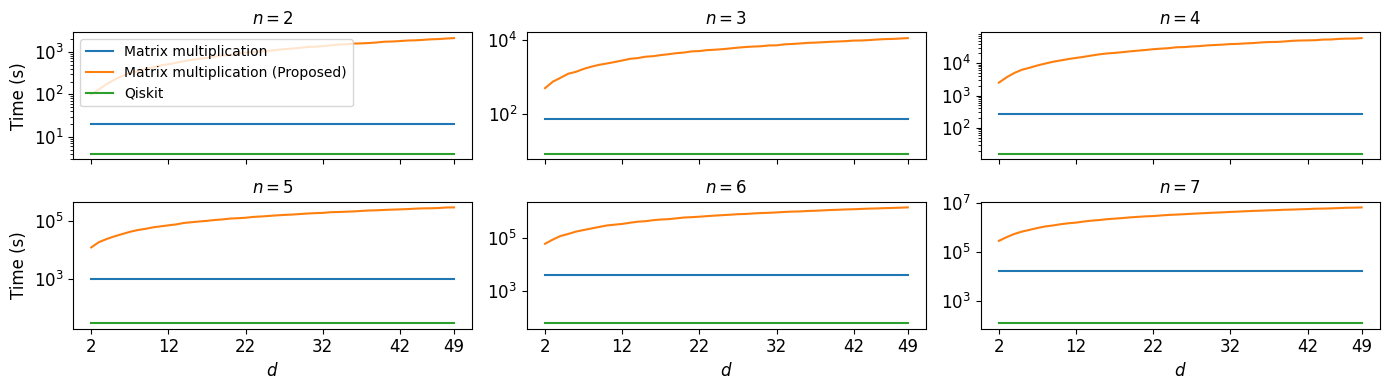

In [22]:
import matplotlib.pyplot as plt
import numpy as np
mem_psr = np.genfromtxt('./result/mem_psr.csv', delimiter=',')
mem_proposed_psr = np.genfromtxt('./result/mem_proposed_psr.csv', delimiter=',')
mem_qiskit = np.genfromtxt('./result/mem_qiskit.csv', delimiter=',')

fig, axs = plt.subplots(2, 3, figsize = (14, 4))
j = 0
for i in range(2,8):
    x = j // 3
    y = j % 3
    axs[x,y].plot(range(2, 50), mem_psr[i - 2][:], label = 'Matrix multiplication')
    axs[x,y].plot(range(2, 50), mem_proposed_psr[i - 2][:], label = 'Matrix multiplication (Proposed)')
    axs[x,y].plot(range(2, 50), mem_qiskit[i - 2][:], label = 'Qiskit')
    
    if y == 0:
        axs[x,y].set_ylabel('Time (s)', fontsize = 12)
    else:
        axs[x,y].set_yticklabels([])
    axs[x,y].set_xticks(list(range(2, 51, 10)) + [49])
    axs[x,y].tick_params(axis='y', labelsize=12)
    axs[x,y].tick_params(axis='x', labelsize=12)
    if x == 1:
        axs[x,y].set_xlabel('$d$', fontsize = 12)
    else:
        axs[x,y].set_xticklabels([])
    axs[x,y].set_yscale('log')
    
    axs[x,y].set_title(f'$n = {i}$')
    j += 1
# set position of legend
axs[0,0].legend(loc='upper left')
plt.tight_layout()
plt.savefig('mem_psr.svg')

In [98]:
print(time_qiskit[0,0]/time_proposed_psr[0,0])

print(time_qiskit[-1,-1]/time_proposed_psr[-1,-1])


7.656315488664508
7.288782867918058
